[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rycroft-group/math513/blob/main/0_fundamentals/0_fundamentals.ipynb)

In [1]:
# Necessity libraries
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.optimize import fsolve
from copy import deepcopy

# Optional: a library for plotting with LaTeX-like 
# styles nicer formatted figures
# Warning: need to have LaTeX installed
import scienceplots
plt.style.use(['science'])

# Unit 0: Fundamentals

## Lecture 3: Norms

### Code demo 1: Vector norms of the unit circle

In two dimensions, we visualize four different norms of the unit circle. We will represent the unit circle using a level set function, and then plot its contour to represent the vector norm.

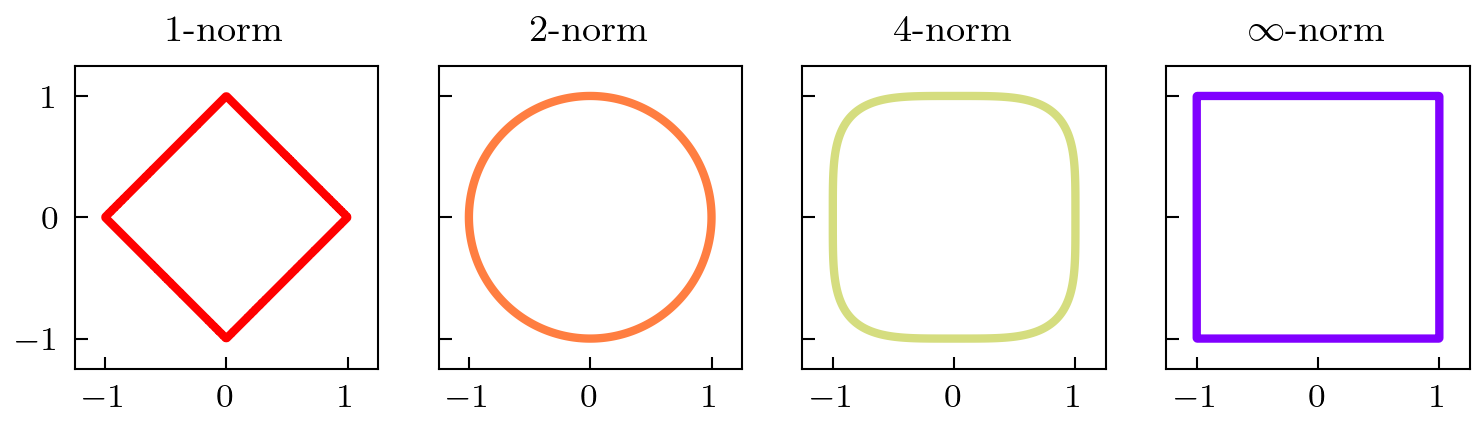

In [2]:
# Define the level set function
# for the unit circle
# e.g. 2 norm is x^2 + y^2 - 1 = 0
def phi(x, y, p=2):
    if p == np.inf:
        return np.maximum(np.abs(x), np.abs(y)) - 1
    else:
        return (np.abs(x)**p + np.abs(y)**p)**(1/p) - 1

# Create meshgrid
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)

# Compute vector norms
norm1 = phi(X, Y, p=1)
norm2 = phi(X, Y, p=2)
norm4 = phi(X, Y, p=4)
normi = phi(X, Y, p=np.inf)

# Optional: make gradient colors
# Create a color gradient for plotting
# Check out more colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
n = 7 # number of p-norms
colors = plt.cm.rainbow_r(np.linspace(0.,1.,n))

# Plot
fig, ax = plt.subplots(1, 4, figsize=(6, 2), sharey=True, dpi=300)
ax[0].contour(X, Y, norm1, levels=[0], colors=[colors[0]], linewidths=2)
ax[0].set_title('$1$-norm', fontsize=9)
ax[1].contour(X, Y, norm2, levels=[0], colors=[colors[1]], linewidths=2)
ax[1].set_title('$2$-norm', fontsize=9)
ax[2].contour(X, Y, norm4, levels=[0], colors=[colors[2]], linewidths=2)
ax[2].set_title('$4$-norm', fontsize=9)
ax[3].contour(X, Y, normi, levels=[0], colors=[colors[-1]], linewidths=2)
ax[3].set_title(r'$\infty$-norm', fontsize=9)

# Formatting
for a in ax:
    a.set_aspect('equal')
    a.grid(False)
    a.set_xlim([-1.25, 1.25])
    a.set_ylim([-1.25, 1.25])
    a.set_xticks([-1, 0, 1])
    a.set_yticks([-1, 0, 1])
    # Prettify
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', bottom=False, left=False)
    a.tick_params(axis='both', which='both', right=False, top=False)
# Save figure
# plt.savefig('results/norm_unit_circle.pdf', bbox_inches='tight', transparent=True)
plt.show()

What if we want to animate the change from 1-norm to $\infty$-norm?

In [3]:
# First, let us import the necessary libraries for
# doing animation in Jupyter notebooks.
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [4]:
# Optional: make gradient colors
# Create a color gradient for plotting
# Check out more colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
n = 100 # number of p-norms
colors = plt.cm.rainbow_r(np.linspace(0.,1.,n))

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(2, 2), dpi=300)
ax.set_aspect('equal')
ax.grid(False)
ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
#x Prettify
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', bottom=False, left=False)
ax.tick_params(axis='both', which='both', right=False, top=False)

# Initialize contour
# (just to hold space, will be deleted in update function)
contour = ax.contour(X, Y, norm1, levels=[0], colors=[colors[0]], linewidths=2)

# Create the animation update function
def update(frame):
    global contour
    for c in contour.collections:
        c.remove()

    p = 1 + frame   # p increases smoothly
    normp = phi(X, Y, p=p)

    contour = ax.contour(X, Y, normp, levels=[0], colors=[colors[frame]], linewidths=2)
    ax.set_title(f'$p={p:d}$')

    return contour.collections

anim = FuncAnimation(fig, update, frames=100, interval=100)

# Close the figure to prevent duplicate display
plt.close(fig)

# Need to include this line to display the animation in Jupyter notebooks
HTML(anim.to_jshtml())

Plot all $p$-norms together.

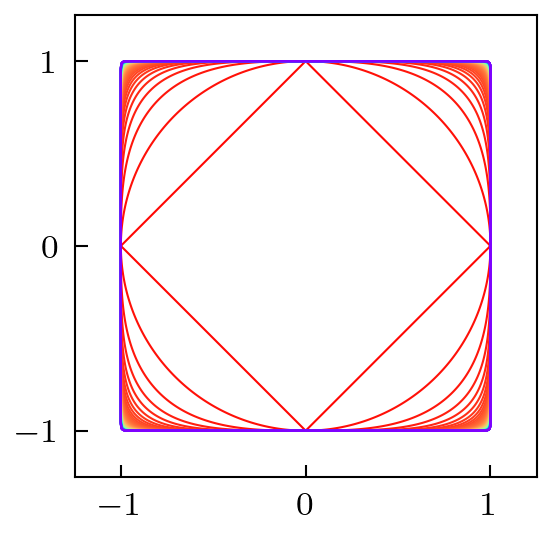

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2), dpi=300)

for p in range(1, 100):
    normp = phi(X, Y, p=p)
    ax.contour(X, Y, normp, levels=[0], colors=[colors[p]], linewidths=0.5)

# Formatting
ax.set_aspect('equal')
ax.grid(False)
ax.set_xlim([-1.25, 1.25])
ax.set_ylim([-1.25, 1.25])
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
#x Prettify
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', bottom=False, left=False)
ax.tick_params(axis='both', which='both', right=False, top=False)

# Save figure
# plt.savefig('results/norm_unit_circle_gradient.pdf', bbox_inches='tight', transparent=True)
plt.show()

### Code demo 2: Linear transformation on unit circle norms

Alternatively, we can plot unit circles using the parametric representation of the circle instead of using meshgrids and level-set functions. This will become easier when applying linear transformation onto the unit circle.

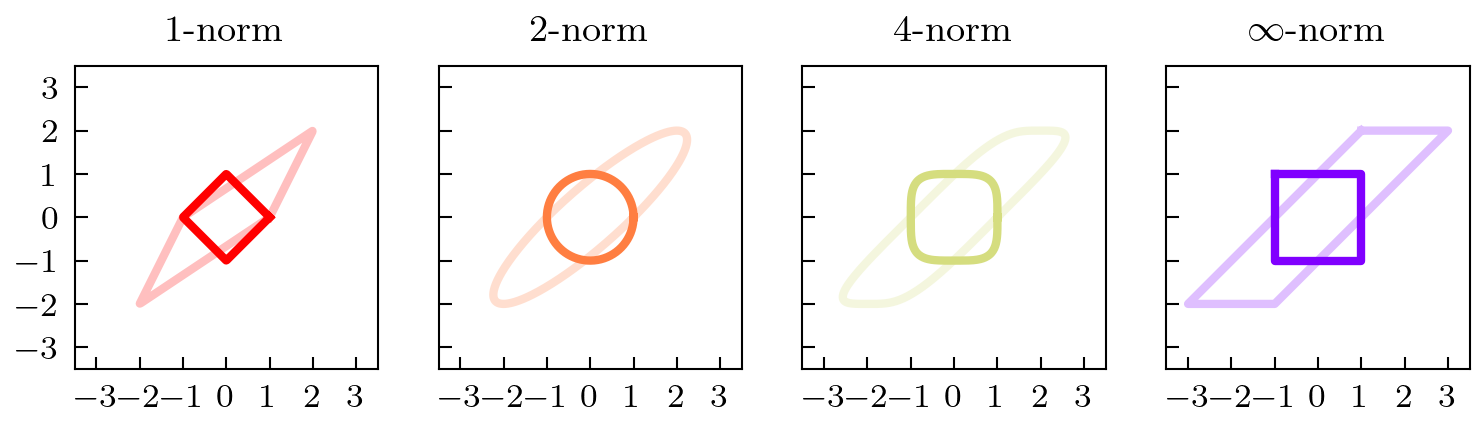

In [6]:
def unit_circle(p, num_points=400):
    # Parameterize the unit circle in L^p norm
    theta = np.linspace(0, 2*np.pi, num_points)
    x = np.cos(theta)
    y = np.sin(theta)
    if p == np.inf:
        # infinity-norm
        n = num_points // 4  # points per edge
        # Top edge (y = 1)
        x_top = np.linspace(-1, 1, n)
        y_top = np.ones(n)
        # Right edge (x = 1)
        x_right = np.ones(n)
        y_right = np.linspace(1, -1, n)
        # Bottom edge (y = -1)
        x_bottom = np.linspace(1, -1, n)
        y_bottom = -np.ones(n)
        # Left edge (x = -1)
        x_left = -np.ones(n)
        y_left = np.linspace(-1, 1, n)
        # Concatenate edges
        x = np.concatenate([x_top, x_right, x_bottom, x_left])
        y = np.concatenate([y_top, y_right, y_bottom, y_left])
    else:
        # p-norm
        r = (np.abs(np.cos(theta))**p + np.abs(np.sin(theta))**p)**(-1/p)
        x = r*np.cos(theta)
        y = r*np.sin(theta)
    return np.vstack([x, y])


# Linear transformation matrix
A = np.array([[1, 2],
              [0, 2]])
norms = [1, 2, 4, np.inf]

# Compute vector norms
norm1_o = unit_circle(1)
norm2_o = unit_circle(2)
norm4_o = unit_circle(4)
normi_o = unit_circle(np.inf)
norm1_A = A @ norm1_o
norm2_A = A @ norm2_o
norm4_A = A @ norm4_o
normi_A = A @ normi_o

# Optional: make gradient colors
# Create a color gradient for plotting
# Check out more colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
n = 7  # number of p-norms
colors = plt.cm.rainbow_r(np.linspace(0., 1., n))

# Plot
fig, ax = plt.subplots(1, 4, figsize=(6, 2), sharey=True, dpi=300)
ax[0].plot(norm1_o[0], norm1_o[1], color=colors[0], linewidth=2)
ax[0].plot(norm1_A[0], norm1_A[1], color=colors[0], linewidth=2, alpha=0.25)
ax[0].set_title('$1$-norm', fontsize=9)
ax[1].plot(norm2_o[0], norm2_o[1], color=colors[1], linewidth=2)
ax[1].plot(norm2_A[0], norm2_A[1], color=colors[1], linewidth=2, alpha=0.25)
ax[1].set_title('$2$-norm', fontsize=9)
ax[2].plot(norm4_o[0], norm4_o[1], color=colors[2], linewidth=2)
ax[2].plot(norm4_A[0], norm4_A[1], color=colors[2], linewidth=2, alpha=0.25)
ax[2].set_title('$4$-norm', fontsize=9)
ax[3].plot(normi_o[0], normi_o[1], color=colors[-1], linewidth=2)
ax[3].plot(normi_A[0], normi_A[1], color=colors[-1], linewidth=2, alpha=0.25)
ax[3].set_title(r'$\infty$-norm', fontsize=9)

# Formatting
for a in ax:
    a.set_aspect('equal')
    a.grid(False)
    a.set_xlim([-3.5, 3.5])
    a.set_ylim([-3.5, 3.5])
    a.set_xticks([-3, -2, -1, 0, 1, 2, 3])
    a.set_yticks([-3, -2, -1, 0, 1, 2, 3])
    # Prettify
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', bottom=False, left=False)
    a.tick_params(axis='both', which='both', right=False, top=False)
# Save figure
# plt.savefig('results/norm_unit_circle_image.pdf', bbox_inches='tight', transparent=True)
plt.show()

### Code demo 3: Vector norms

We define an arbitrary vector and compute its vector norms from 1-norm to $\infty$-norm. We plot the resulted $p$-norm as a function of $p$.

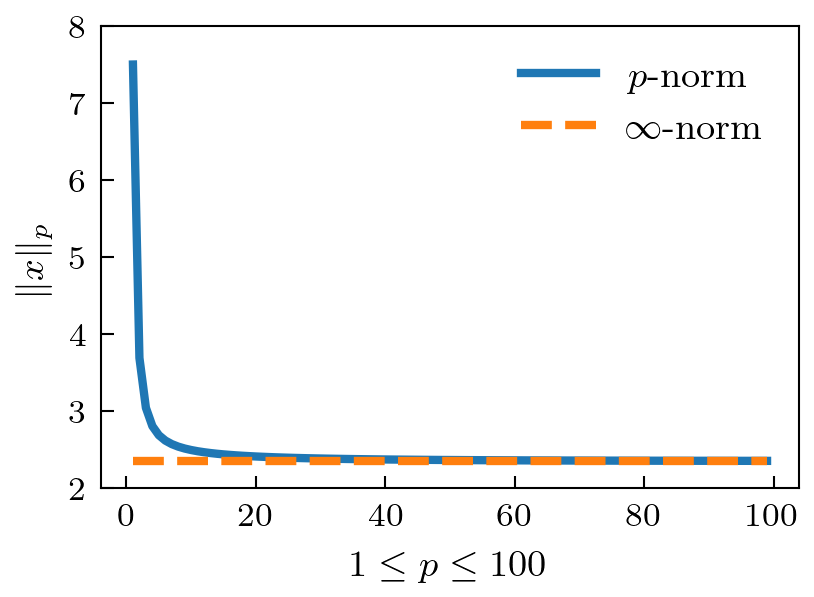

In [7]:
# Make an arbitrary vector
x = np.array([1.2, 0.5, -0.1, 2.3, -1.05, -2.35])

# Calculate the p-norm for a range of values of p
pr = np.arange(1, 100)
nx = [np.linalg.norm(x, p) for p in pr]

# Calculate the infinity norm
ni = [np.linalg.norm(x, np.inf)] * len(pr)
# The multiplication by len(pr) is to make the
# lengths match for plotting

# Plot the norms
fig, ax = plt.subplots(figsize=(3, 2), dpi=300)
ax.plot(pr, nx, label='$p$-norm', color='tab:blue', lw=2)
ax.plot(pr, ni, '--', label='$\infty$-norm', color='tab:orange', lw=2)

# Formatting
ax.set_ylim(2, 8)
ax.set_xlabel('$1 \leq p \leq 100$', fontsize=9)
ax.set_ylabel('$\|x\|_p$', fontsize=9)
ax.legend(loc='upper right', fontsize=9)
# Prettify
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', bottom=False, left=False)
ax.tick_params(axis='both', which='both', right=False, top=False)
# Save figure
# plt.savefig('results/norm.pdf', bbox_inches='tight', transparent=True)
plt.show()

## Lecture 5: Matrix visualization

For a two-dimensional matrix, we will demonstrate a few ways to visualize it. These visualization techniques will become useful for debugging and also for visualizing the data/field.

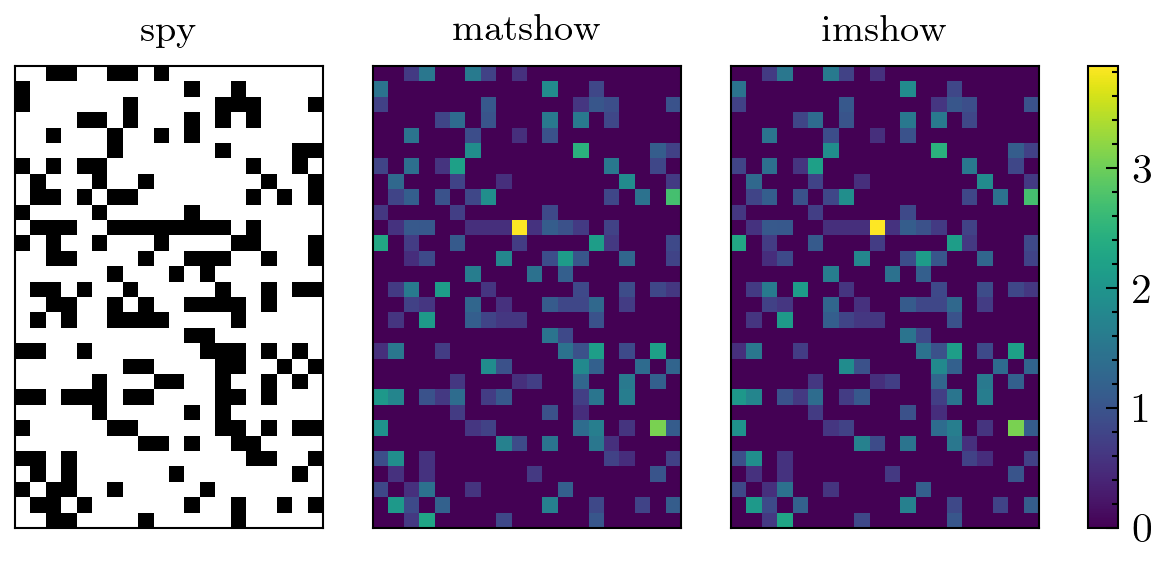

In [8]:
# Create a random mxn matrix
m = 30
n = 20
seed = 42
np.random.seed(seed)  # set seed for reproducibility
A = np.random.randn(m, n)  # random matrix with normal distribution
# Set some entries to zero to make it sparse
A[A < 0.5] = 0

# Visualize matrix via different methods
fig, axes = plt.subplots(1, 4, figsize=(4.75, 2), dpi=300, 
                         gridspec_kw={'width_ratios': [1, 1, 1, 0.1]})
# spy will show the sparsity pattern
axes[0].spy(A)
# matshow will show the matrix as is
axes[1].matshow(A, cmap='viridis')
# imshow will also show the matrix as is
im = axes[2].imshow(A, cmap='viridis')

# Formatting
# Add a colorbar for the imshow plot
fig.colorbar(im, cax=axes[3])
axes[0].set_title('spy', fontsize=9)
axes[1].set_title('matshow', fontsize=9)
axes[2].set_title('imshow', fontsize=9)
# Prettify
for a in axes[:3]:
    a.set_xticks([])
    a.set_yticks([])
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', bottom=False, left=False)
    a.tick_params(axis='both', which='both', right=False, top=False)
# Save figure
# plt.savefig('results/vizmat.pdf', bbox_inches='tight', transparent=True)
plt.show()

Now we will see how to visualize a matrix as a 2D heat map or a 3D surface.

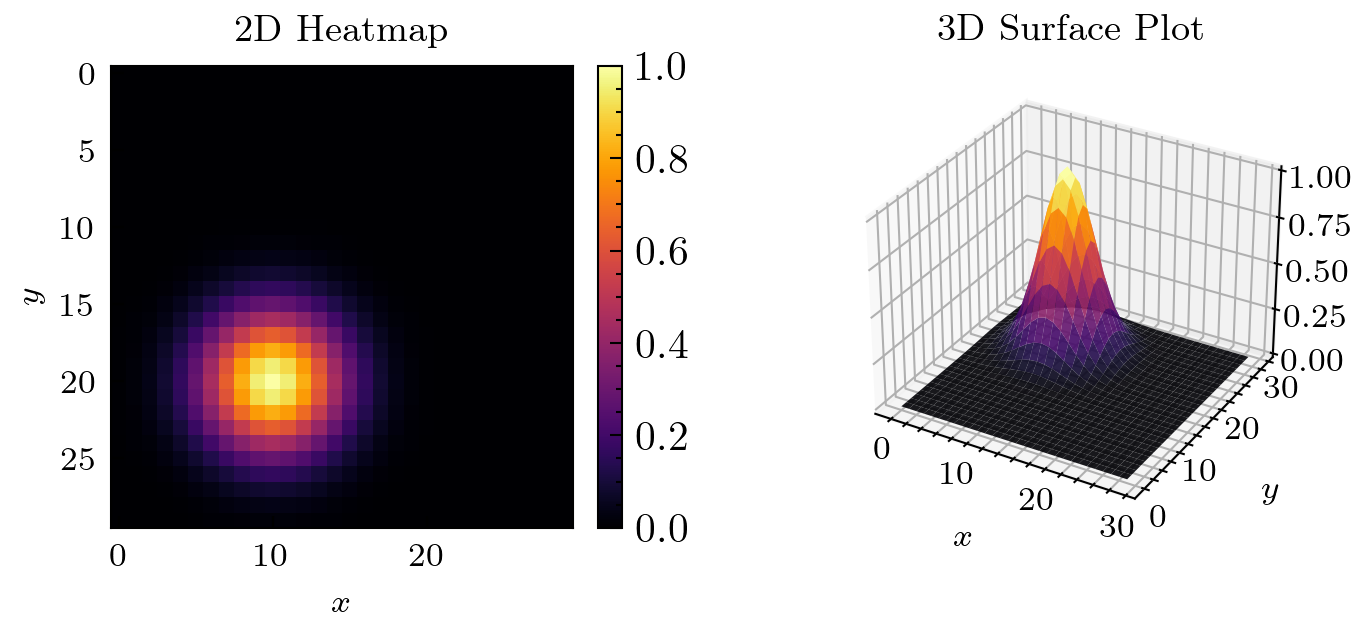

In [9]:
# Create a 2D matrix
m = 30
n = 30
# Create a meshgrid for x and y
x = np.linspace(0, m-1, m)
y = np.linspace(0, n-1, n)
X, Y = np.meshgrid(x, y)
# Make a smooth Gaussian matrix
A = np.exp(-0.05 * ((X - 10)**2 + (Y - 20)**2))

fig = plt.figure(figsize=(6, 2), dpi=300)
# 2D heatmap
ax1 = fig.add_subplot(1, 2, 1)
im = ax1.imshow(A, cmap='inferno')
# 3D surface plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, A, cmap='inferno', edgecolor='none', alpha=0.9, rstride=1, cstride=1)

# Formatting
fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
ax1.set_title('2D Heatmap', fontsize=9)
ax1.set_xlabel('$x$', fontsize=8)
ax1.set_ylabel('$y$', fontsize=8)
ax2.set_title('3D Surface Plot', fontsize=9)
ax2.tick_params(axis='x', pad=-5)
ax2.tick_params(axis='y', pad=-5)
ax2.tick_params(axis='z', pad=-2)
ax2.set_xlabel('$x$', fontsize=8, labelpad=-7)
ax2.set_ylabel('$y$', fontsize=8, labelpad=-7)
ax2.set_zlabel('$z$', fontsize=8, labelpad=-5)
# Prettify
for a in [ax1, ax2]:
    a.tick_params(axis='both', which='major', labelsize=8)
    a.tick_params(axis='both', which='minor', bottom=False, left=False)
    a.tick_params(axis='both', which='both', right=False, top=False)
# Save figure
# plt.savefig('results/vizmat_3d.pdf', bbox_inches='tight', transparent=True)
plt.show()